## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(all_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = all_data[all_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = all_data.drop(duplicates.index[0:5])

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

by_regimen = clean_data.groupby('Drug Regimen')


tum_mean = by_regimen['Tumor Volume (mm3)'].mean()
tum_median = by_regimen['Tumor Volume (mm3)'].median()
tum_variance = by_regimen['Tumor Volume (mm3)'].var()
tum_stdev = by_regimen['Tumor Volume (mm3)'].std()
tum_sem = by_regimen['Tumor Volume (mm3)'].sem()

sum_stats = pd.DataFrame({
                        'Mean': tum_mean,
                        'Median': tum_median,
                        'Variance': tum_variance,
                        'Standard Deviation': tum_stdev,
                        'SEM': tum_sem
                        })

sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_group = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

tumor_group

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

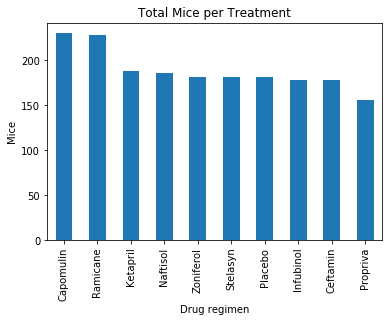

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment = clean_data['Drug Regimen'].value_counts()

mice_per_treatment.plot(kind='bar', title='Total Mice per Treatment')

plt.xlabel('Drug regimen')
plt.ylabel('Mice')
plt.show()

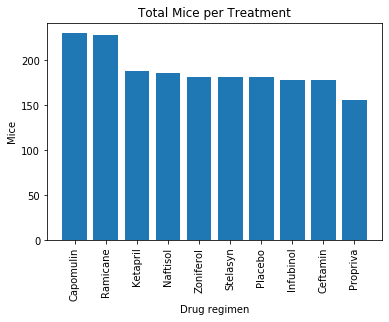

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mice_per_treatment.index.values, mice_per_treatment.values)
plt.xlabel('Drug regimen')
plt.ylabel('Mice')
plt.title('Total Mice per Treatment')
plt.xticks(rotation=90)
plt.show()

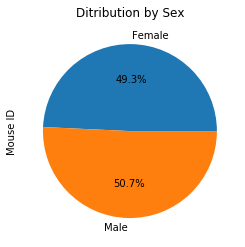

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = clean_data.groupby('Sex')

sex_count = sex_group['Mouse ID'].count()

sex_count.plot(kind='pie', title='Female vs Male',autopct="%1.1f%%")
plt.title('Ditribution by Sex')
plt.show()

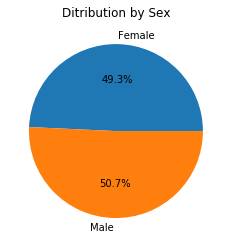

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index.values, autopct="%1.1f%%")

plt.title('Ditribution by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_group = max_timepoint.merge(clean_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_group

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_group['Tumor Volume (mm3)'].loc[merged_group['Drug Regimen'] == regimen]
    
    # add subset 
    tumor_list.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25, .50, .75])
    lower_quart = quartiles[.25]
    upper_quart = quartiles[.75]
    IQR = upper_quart - lower_quart
    outlier_lower = lower_quart - (1.5 * IQR)
    outlier_upper = upper_quart + (1.5 * IQR)
    
    outliers = tumor_volumes.loc[(tumor_volumes < outlier_lower) | (tumor_volumes > outlier_upper)]
    
    
    if outliers.size > 0:
        outliers=outliers.values
    else:
        outliers='None'
        
    print(str(regimen) + '-' + "  IQR: " + str(IQR) + ' Outliers: ' + str(outliers))


Capomulin-  IQR: 7.781863460000004 Outliers: None
Ramicane-  IQR: 9.098536719999998 Outliers: None
Infubinol-  IQR: 11.477135160000003 Outliers: [36.3213458]
Ceftamin-  IQR: 15.577752179999997 Outliers: None


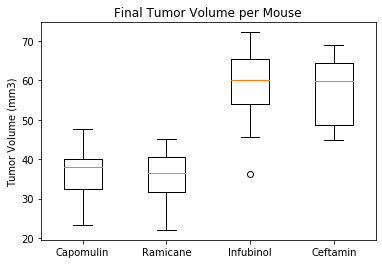

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Mouse')
ax1.set_xticklabels(treatment_list)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_list)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment - Mouse s185')

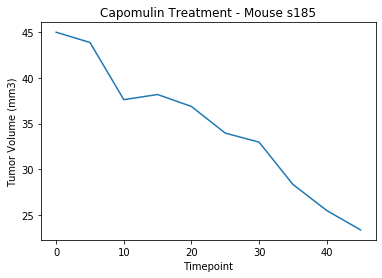

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_list = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
capomulin_list.head()

s185 = capomulin_list.loc[capomulin_list['Mouse ID'] == 's185']

xaxis = s185['Timepoint']
yaxis = s185['Tumor Volume (mm3)']

plt.plot(xaxis,yaxis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment - Mouse s185')


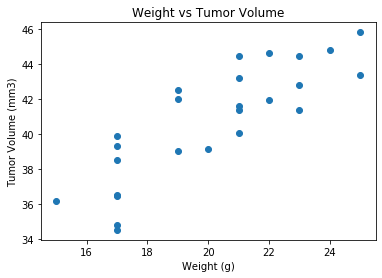

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
volume_mean = capomulin_list.groupby('Mouse ID').mean()

plt.scatter(volume_mean['Weight (g)'], volume_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Tumor Volume')
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight_corr = volume_mean['Weight (g)']
volume_corr = volume_mean['Tumor Volume (mm3)']

correlation = st.pearsonr(weight_corr, volume_corr)

print('Correlation: ' + str(correlation[0]))

Correlation: 0.8419363424694717


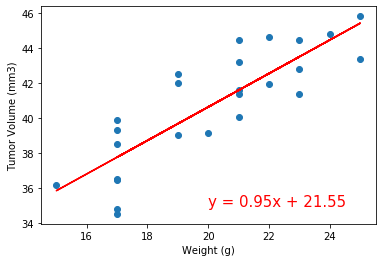

In [19]:
x_values = weight_corr
y_values = volume_corr

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()